In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import util
from scipy.stats import expon

In [2]:
data = pd.read_csv("../data/files_data/files.csv")
X = data['f0_']

In [4]:
X = sorted(X)
Q1 = X[2500]
Q3 = X[7500]
IQR = Q3-Q1
R1 = Q1 - 1.5*IQR
R2 = Q3 + 1.5*IQR
X2 = []
for i in range(0,len(X)):
    if X[i] > R1 and X[i] < R2:
        X2.append(X[i])
X = X2.copy()

In [5]:
X_dict = dict()
for i in range(0,len(X)):
    if X[i] in X_dict:
        X_dict[X[i]] += 1
    else:
        X_dict[X[i]] = 1

SortX = sorted(X_dict.items(), key=lambda s: s[0])

In [6]:
x_vals = []
y_vals = []
for i in range(0,len(SortX)):
    x_vals.append(SortX[i][0])
    y_vals.append(SortX[i][1]/len(X))

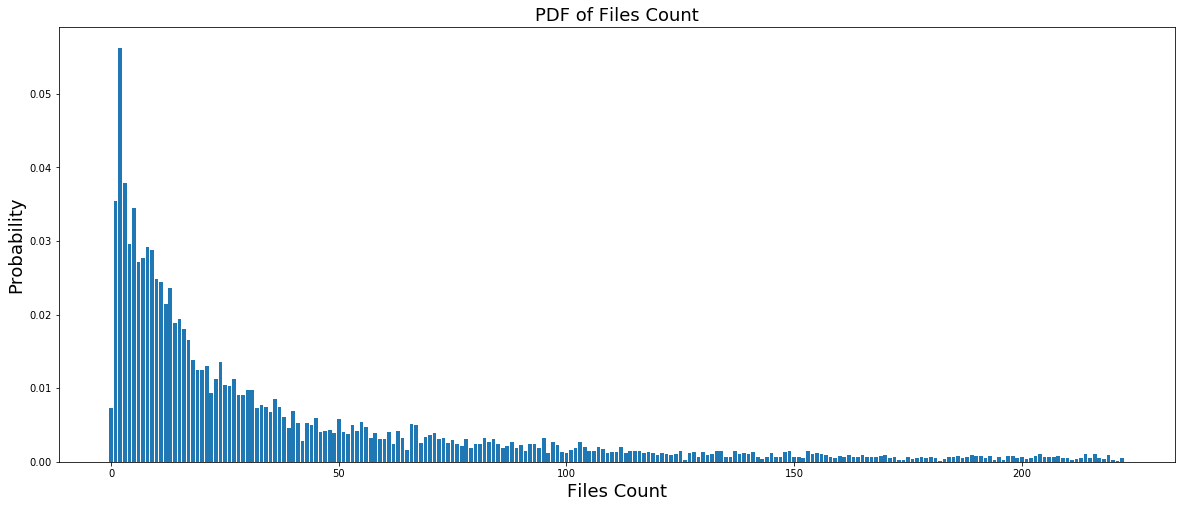

In [12]:
y_pos = np.arange(len(x_vals))
plt.figure(figsize=(20,8))
plt.bar(y_pos, y_vals, align='center')
# plt.xticks(y_pos, x_vals)
plt.ylabel('Probability', fontsize=18)
plt.xlabel('Files Count', fontsize=18)
plt.title('PDF of Files Count', fontsize=18)
plt.show()

In [49]:
X_modified = X.copy()
for pair in SortX:
    if pair[0] > 5:
        for i in range(0, pair[1]):
            X_modified.append( 6 - pair[0] )

In [52]:
util.walds_test_1_population(X_modified, 3, 1.96)


==== Wald's Test for 1 Population ====
3.025606469
se     = 0.4910572448993681
w      = 0.0521455884597
thres  = 1.96
result = Passed



True

In [54]:
util.getVar(X)

2135.6678034553115